# I2A2 – ABDI –Challenge 2
# João Paulo da Silva Cardoso

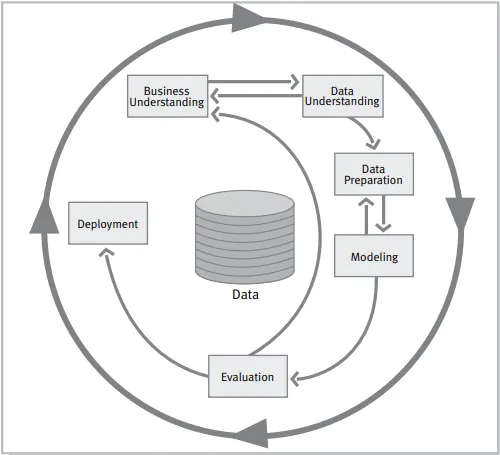

# 0 - Importação das bibliotecas necessárias para visualização de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1 -  Entendimento do Negócio

## Esta etapa é mais conceitual e envolve compreender o problema a ser resolvido, o que foi discutido anteriormente.

## O foco é na sobrevivência dos passageiros do Titanic, tentando identificar padrões e correlações que possam explicar os resultados observados.



# 2 - Entendimento dos Dados

In [2]:
# Carregando o dataset
df = pd.read_csv('/content/train.csv',index_col='PassengerId')  # Substitua 'titanic.csv' pelo caminho correto do arquivo

## Vamos carregar o dataset do Titanic e realizar uma análise exploratória inicial para entender a estrutura e a qualidade dos dados.

- **Survived**: Indica se o passageiro sobreviveu (1) ou não (0).
- **Pclass**: Classe do bilhete do passageiro, sendo 1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe.
- **Name**: Nome do passageiro.
- **Sex**: Gênero do passageiro.
- **Age**: Idade do passageiro em anos.
- **SibSp**: Número de irmãos/cônjuges a bordo do Titanic.
- **Parch**: Número de pais/filhos a bordo do Titanic.
- **Ticket**: Número do bilhete.
- **Fare**: Tarifa paga pelo passageiro.
- **Cabin**: Número da cabine do passageiro.
- **Embarked**: Porto de embarque do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton).

Essas são as variáveis presentes no conjunto de dados do Titanic e fornecem informações sobre diferentes aspectos dos passageiros, incluindo detalhes demográficos, socioeconômicos e de viagem. Essas variáveis serão exploradas durante a análise para entender melhor os padrões e fatores que influenciaram a sobrevivência no desastre do Titanic.

In [3]:
# Visualizando as linhas e colunas do dataset
num_row, num_col = df.shape
print("Número de registros:", num_row)
print("Número de colunas:", num_col)

Número de registros: 891
Número de colunas: 11


In [4]:
# Visualizando as primeiras linhas do dataset
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Informações básicas sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# Estatísticas descritivas das variáveis numéricas
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
Pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
Age,714.0,29.70,14.53,0.42,20.12,28.00,38.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


In [7]:
# Contagem de valores ausentes por coluna
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

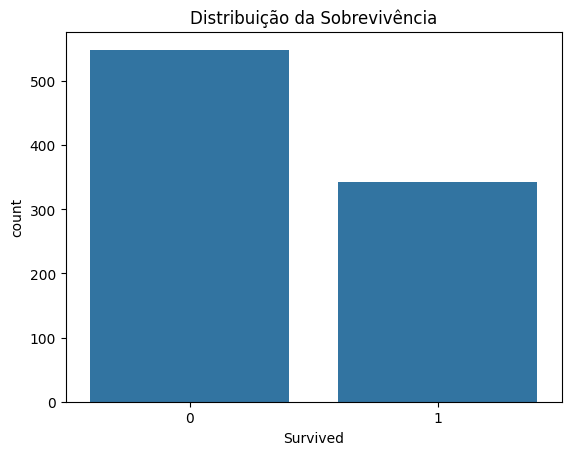

In [8]:
# Distribuição da variável target 'Survived'
sns.countplot(x='Survived', data=df)
plt.title('Distribuição da Sobrevivência')
plt.show()

# 3 - Preparação dos Dados

## Nesta fase, vamos tratar os valores ausentes, converter variáveis categóricas e criar novos recursos que possam ser úteis para a modelagem.



In [9]:
medians = df.groupby(['Survived','Pclass', 'Sex', 'SibSp', 'Parch'])['Age'].transform('median')
df.fillna({'Age': medians}, inplace = True)

medians = df.groupby(['Survived','Pclass', 'Sex'])['Age'].transform('median')
df.fillna({'Age': medians}, inplace = True)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


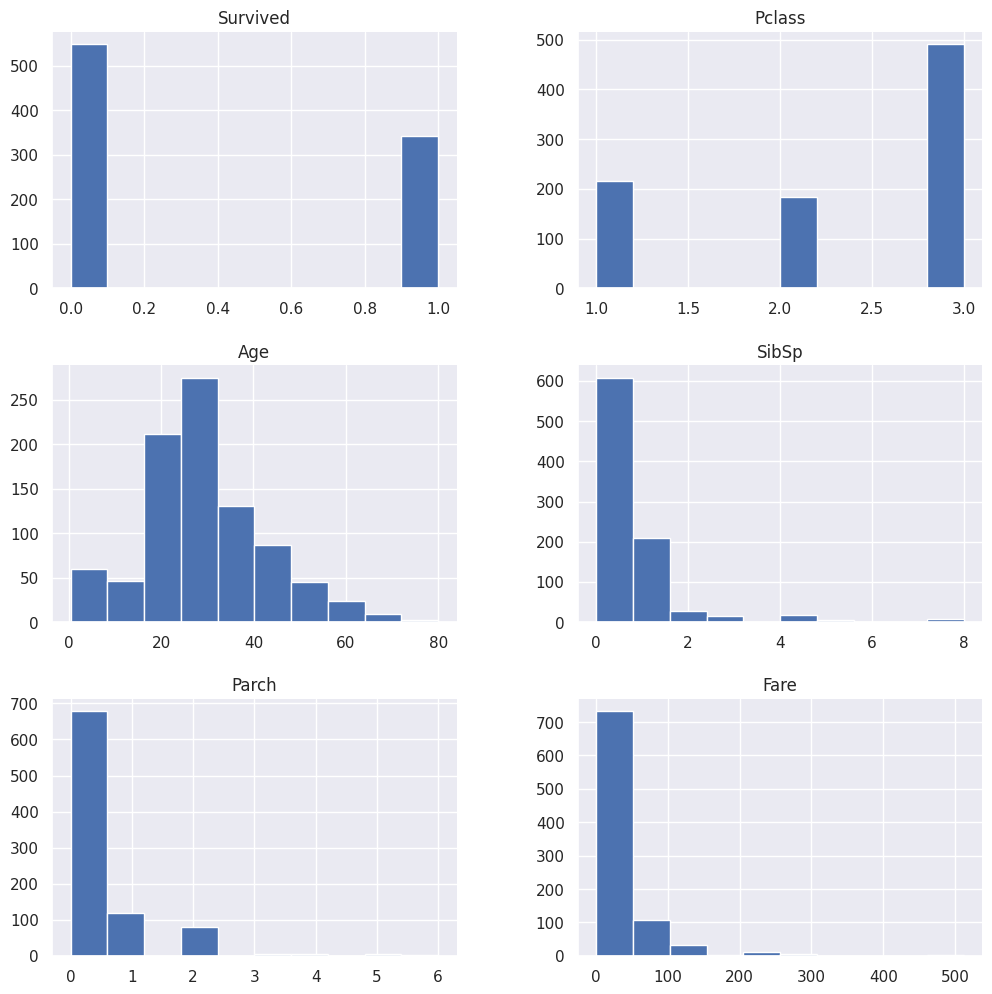

In [10]:
# Ajusta o estilo dos gráficos
sns.set(style="darkgrid")

# Histograma
df.hist(figsize=(12, 12))

# Aplica despine a cada subplot
sns.despine()

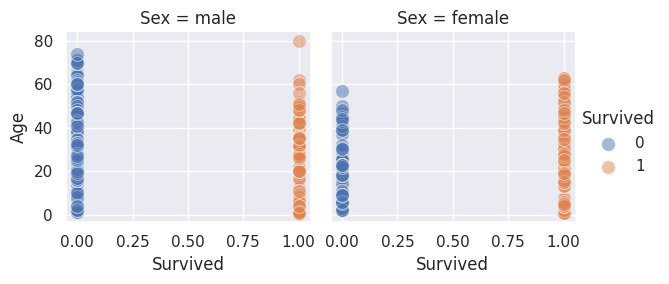

In [11]:
# Criação de uma FacetGrid com os dados do DataFrame 'df', organizada por gênero ('Sex'), colorindo os pontos pela variável 'Survived'
g = sns.FacetGrid(df, col="Sex", hue="Survived")

# Mapeamento de um scatterplot nos dados da FacetGrid, com 'Survived' no eixo x, 'Age' no eixo y, e definição de tamanho (s=100) e transparência (alpha=.5) dos marcadores
g.map(sns.scatterplot, "Survived", "Age", s=100, alpha=.5)

# Adição de uma legenda com base na variável 'Survived' aos gráficos
g.add_legend()

# Remoção das bordas dos gráficos para melhorar a estética
sns.despine()

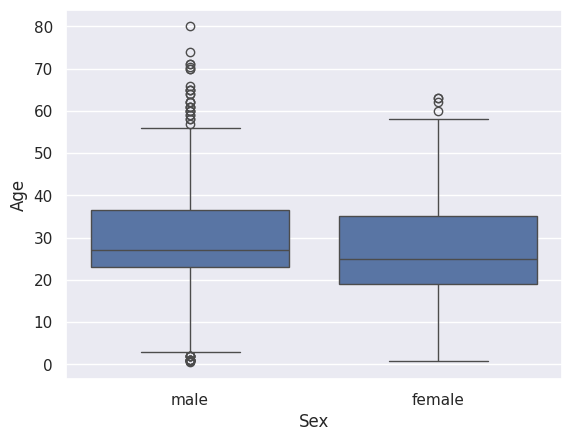

In [12]:
sns.boxplot(x='Sex', y='Age', data=df);

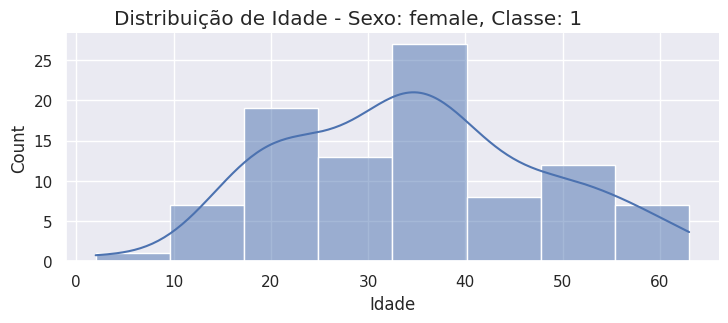

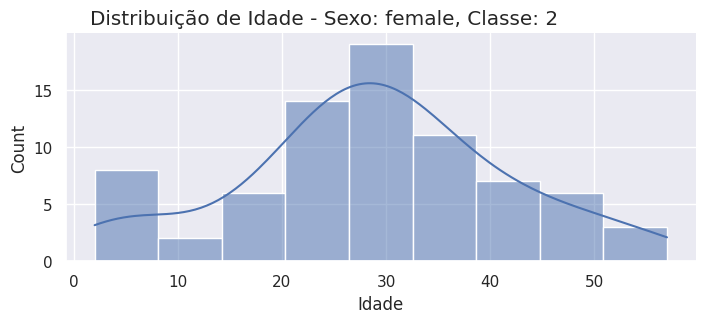

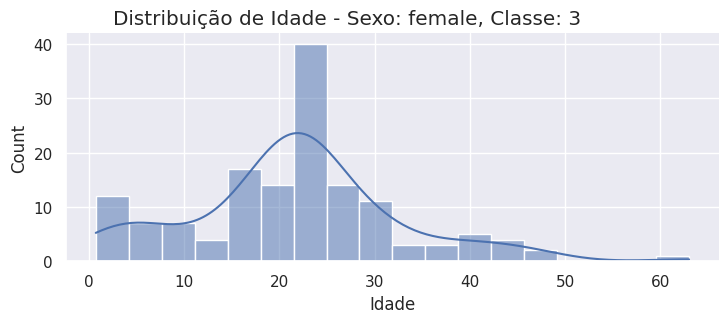

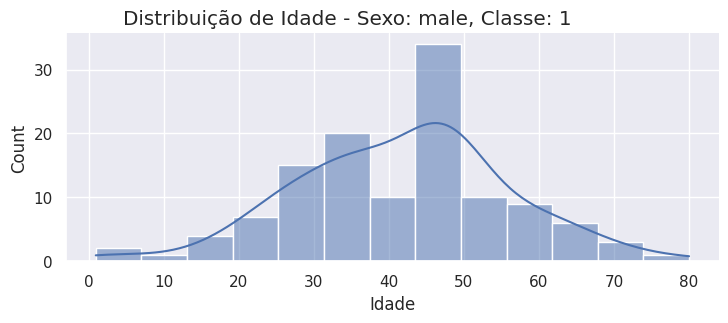

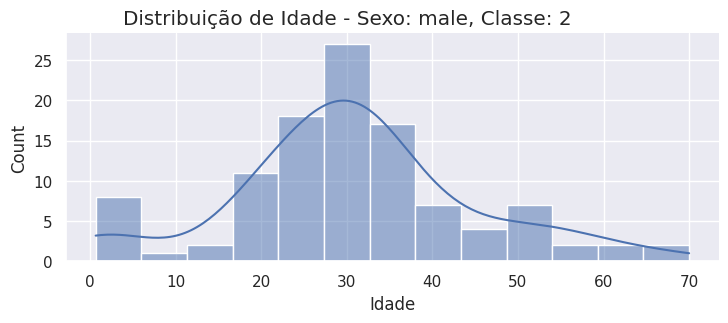

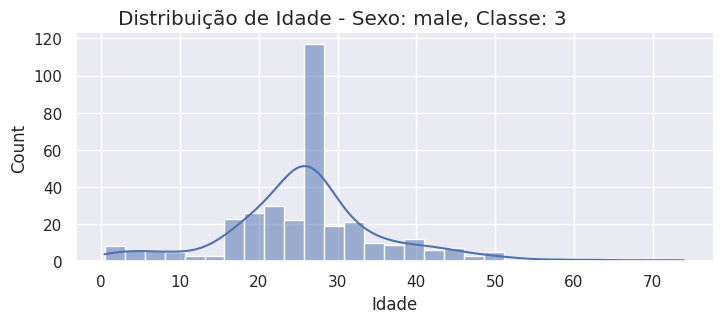

In [13]:
# Plota uma distribuição de frequência de Idade filtrando por Sexo e Classe
def displot_filter_ages_to_sex_and_pclass(sex_id, pclass_id):
    # Filtragem mais direta para Sexo e Classe
    df_filtered = df[(df['Sex'] == sex_id) & (df['Pclass'] == pclass_id)]

    # Usando seaborn para plotar a distribuição
    ax = sns.displot(df_filtered['Age'], kde=True)
    ax.fig.suptitle(f'Distribuição de Idade - Sexo: {sex_id}, Classe: {pclass_id}')  # Definindo o título
    ax.fig.subplots_adjust(top=0.9)  # Ajustando o título para não cortar
    ax.set(xlabel='Idade')  # Definindo a label do eixo x
    ax.fig.set_size_inches(8, 3)  # Ajustando o tamanho do gráfico

# Chamadas de função para diferentes combinações de Sexo e Classe
displot_filter_ages_to_sex_and_pclass('female', 1)
displot_filter_ages_to_sex_and_pclass('female', 2)
displot_filter_ages_to_sex_and_pclass('female', 3)
displot_filter_ages_to_sex_and_pclass('male', 1)
displot_filter_ages_to_sex_and_pclass('male', 2)
displot_filter_ages_to_sex_and_pclass('male', 3)